In [1]:
import json
import numpy as np
import torch
from torch import nn
from torch.utils import data
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path
from ppo_model import RllibPPOModel
from gym import spaces
import bc
print(bc.device)

cpu


In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
DATA_FOLDER = "../mocker/fox_recovery"
LOAD_CHECKPOINT = None
SAVE_CHECKPOINT = "./bc_agent_fox_recovery"
BATCH_SIZE = 128

In [12]:
states, actions, dim_states, num_actions = bc.states_from_folder(DATA_FOLDER)
state_size, buffer_size = dim_states
print(f"{len(states)} steps. dim_states {dim_states}, num_actions {num_actions}")
train_dataloader, test_dataloader = bc.datasets(states, actions, batch_size=BATCH_SIZE)

8385 steps. dim_states (87, 64), num_actions 69


Epoch 0     Train Loss: 4.56  Test Loss: 4.10 
Epoch 1     Train Loss: 4.00  Test Loss: 3.89 
Epoch 2     Train Loss: 3.74  Test Loss: 3.57 
Epoch 3     Train Loss: 3.35  Test Loss: 3.14 
Epoch 4     Train Loss: 2.91  Test Loss: 2.69 
Epoch 5     Train Loss: 2.54  Test Loss: 2.38 
Epoch 6     Train Loss: 2.31  Test Loss: 2.27 
Epoch 7     Train Loss: 2.19  Test Loss: 2.15 
Epoch 8     Train Loss: 2.14  Test Loss: 2.15 
Epoch 9     Train Loss: 2.10  Test Loss: 2.12 
Epoch 10    Train Loss: 2.10  Test Loss: 2.09 
Epoch 11    Train Loss: 2.08  Test Loss: 2.08 
Epoch 12    Train Loss: 2.07  Test Loss: 2.07 
Epoch 13    Train Loss: 2.05  Test Loss: 2.07 
Epoch 14    Train Loss: 2.05  Test Loss: 2.07 
Epoch 15    Train Loss: 2.07  Test Loss: 2.06 
Epoch 16    Train Loss: 2.05  Test Loss: 2.05 
Epoch 17    Train Loss: 2.05  Test Loss: 2.06 
Epoch 18    Train Loss: 2.04  Test Loss: 2.05 
Epoch 19    Train Loss: 2.03  Test Loss: 2.05 
Epoch 20    Train Loss: 2.04  Test Loss: 2.05 
Epoch 21    T

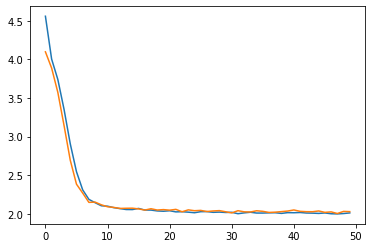

In [15]:
bc_agent = bc.LinearBufferAgent(buffer_size, state_size, num_actions)
if LOAD_CHECKPOINT:
    bc_agent.load_state(LOAD_CHECKPOINT)
else:
    bc.train(bc_agent, train_dataloader, test_dataloader, num_actions, num_epochs=50)
    if SAVE_CHECKPOINT:
        bc_agent.save_state(SAVE_CHECKPOINT)

In [24]:
bc.play(bc_agent, cpu_level=1, buffer_size=buffer_size, frame_skip=1)

Connecting to console...
Connecting controller to console...
Controllers connected
STOPPING DOLPHIN


In [6]:
bc.play(bc_agent, cpu_level=9)

Connecting to console...
Connecting controller to console...
Controllers connected
STOPPING DOLPHIN
